Disclaimer:

Heavy calculations. Current parameters won't give converged solution but are simplified to give results on x cores in x hrs.


# CaFeO3 CSC with VASP PLOs

In [1]:
import numpy as np
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = (8, 4)
plt.rcParams['figure.dpi'] = 150

## Running the initial SCF DFT calculation (~ 1 core hour)

Get started:
- Go into folder `1_dft_scf`
- Insert POTCAR as concatenation of `PAW_PBE Ca_sv`, `PAW_PBE Fe_pv` and `PAW_PBE O`
- Goal: get well-converged charge density

Input files:
- INCAR: large number of steps for good convergence (cheap calculation which will be starting point for future calculations)
- POSCAR: CaFeO3 close to experimental low-temperature structure (P21/n symmetry) -> insulating in experiment
- KPOINTS: approximately unidistant grid of 7 x 7 x 5

Run Vasp with `mpirun -n 8 vasp_std`.

In [2]:
dft_energy, dft_dos = np.loadtxt('1_dft_scf/refs/DOSCAR', skiprows=6, unpack=True, usecols=(0, 1))

Text(0, 0.5, 'DOS (1/eV)')

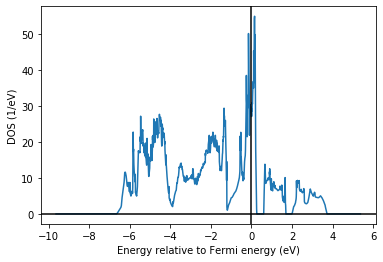

In [3]:
fermi_energy = 4.63 # can be read from DOSCAR header or OUTCAR

fig, ax = plt.subplots()
ax.plot(dft_energy-4.63, dft_dos)
ax.axhline(0, c='k')
ax.axvline(0, c='k')
ax.set_xlabel('Energy relative to Fermi energy (eV)')
ax.set_ylabel('DOS (1/eV)')

The DOS contains (can be checked with partial DOS):
- split Fe-eg bands in the range 0.5 to 4 eV
- mainly Fe-t2g bands between -1.5 and 0.5 eV
- mainly O-p bands between -7 and -1.5 eV
- hybridization between Fe-t2g and O-p

Ways DFT gets the system wrong:
- system is in low-spin configuration: four d electrons in t2gs instead of 3 in t2gs and 1 in egs
- system is metallic instead of insulating

Because of t2g contribuations in the O-p-dominated energy range, we use the whole energy range shown to define the correlated subspace via the projectors.

## Input files for CSC DMFT calculations
- Explain plo.cfg, dmft_config.ini
- Say how to adjust parameters for well-converged calculations
- Explain other input files?

## Running the CSC DMFT calculations
- Link relevant files like CHGCAR, KPOINTS, POSCAR, POTCAR from previous directory by running `./2_1_link_files.sh`
- Explain CSC principle (shortly), how Vasp works in CSC mode (vasp.lock) and what GAMMA file does
- Run with `mpirun -n 32 python3 uni_dmft.py`
- Discuss output and results: occupations, energies

In [4]:
energies = []
doss = []
for imp in range(4):
    data = np.loadtxt(f'2_dmft_csc/refs/pdos_0_{imp}.dat', unpack=True)
    energies.append(data[0])
    doss.append(data[1:])
    
energies = np.array(energies)
doss = np.array(doss)

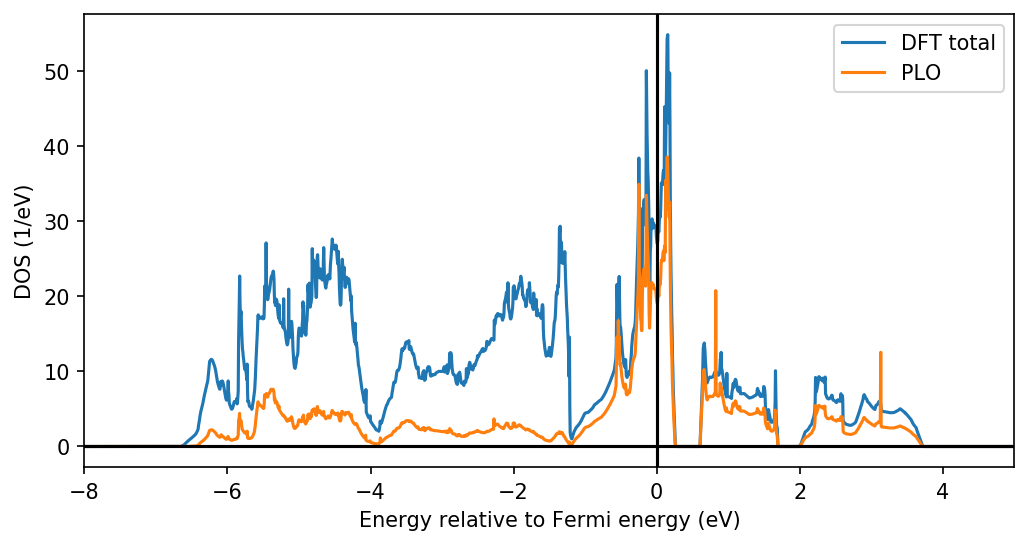

In [5]:
fig, ax = plt.subplots(figsize=(8, 4), dpi=150)

ax.plot(dft_energy-4.63, dft_dos, label='DFT total')
ax.plot(energies[0], np.sum(doss, axis=(0, 1)), label='PLO')
#for energy, dos in zip(energies, doss):
#    ax.plot(energy, dos.T)
ax.axhline(0, c='k')
ax.axvline(0, c='k')
ax.set_xlim(-8, 5)
ax.set_xlabel('Energy relative to Fermi energy (eV)')
ax.set_ylabel('DOS (1/eV)')
ax.legend()